# IMPORTS

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Nesta parte do trabalhamos pretendemos realizar unsupervised learaning, ou seja UMAP, PCA, t-SNE, clustering.E tirar as respetivas conclusoes


In [2]:
path="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\dataset.csv"
data=pd.read_csv(path)

In [6]:
data

,Y,drug1 MolWt,drug1 HeavyAtomMolWt,drug1 ExactMolWt,drug1 BertzCT,drug1 TPSA,morgan drug1 15,morgan drug1 33,morgan drug1 36,morgan drug1 64,...,Parametro 8775,Parametro 8776,Parametro 8777,Parametro 8778,Parametro 8779,Parametro 8780,Parametro 8781,Parametro 8782,Parametro 8783,Parametro 8784
0,7.693530,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.933708,0.433194,-0.705877,-0.797751,0.494978,-0.239587,1.279730,0.691891,-0.982503,-0.364565
1,7.778053,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.453011,0.868781,-0.548668,1.191511,0.947887,0.393898,1.241226,1.139293,-1.070203,-0.425415
2,-1.198505,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-0.367088,-0.495932,-0.639091,-0.346006,-0.034777,-1.268040,-0.277364,-0.423137,-1.065120,-1.002490
3,2.595684,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.852838,-0.152449,-0.653551,0.369509,-0.358118,1.586969,1.275677,0.621267,-0.365272,-0.818869
4,-5.139971,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-1.854093,-2.383995,0.068724,-0.583244,-2.238896,-1.288220,-1.650908,-1.705543,-0.714340,0.635244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,10.223066,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.989373,0.598182,-0.708544,-0.494359,-0.540534,-0.977627,-0.762502,0.882945,-1.073682,0.481022
19862,20.551627,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19863,12.190316,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19864,23.438547,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.345755,0.172750,-0.672222,-0.729491,0.774517,0.535449,0.406174,-0.436593,1.207464,-1.522136


o nosso objetivo ser aidentificar as colunas cujo nome não é parametro e analisar a correlção entre um subgrupo das mesmas e a variavel Y.
Para a escolha desse subgrupo iremos selecionar as que tem maior variancia top 10

In [7]:

colunas_sem_parametro = [coluna for coluna in data.columns if 'parametro' not in coluna.lower()]

numero_colunas_sem_parametro = len(colunas_sem_parametro)

print("Colunas sem o nome 'parametro':", colunas_sem_parametro)
print("Número de colunas sem o nome 'parametro':", numero_colunas_sem_parametro)


Colunas sem o nome 'parametro': ['Y', 'drug1 MolWt', 'drug1 HeavyAtomMolWt', 'drug1 ExactMolWt', 'drug1 BertzCT', 'drug1 TPSA', 'morgan drug1 15', 'morgan drug1 33', 'morgan drug1 36', 'morgan drug1 64', 'morgan drug1 80', 'morgan drug1 90', 'morgan drug1 102', 'morgan drug1 119', 'morgan drug1 121', 'morgan drug1 128', 'morgan drug1 130', 'morgan drug1 138', 'morgan drug1 147', 'morgan drug1 175', 'morgan drug1 222', 'morgan drug1 233', 'morgan drug1 250', 'morgan drug1 301', 'morgan drug1 305', 'morgan drug1 314', 'morgan drug1 333', 'morgan drug1 361', 'morgan drug1 378', 'morgan drug1 389', 'morgan drug1 428', 'morgan drug1 433', 'morgan drug1 456', 'morgan drug1 463', 'morgan drug1 486', 'morgan drug1 512', 'morgan drug1 656', 'morgan drug1 679', 'morgan drug1 694', 'morgan drug1 695', 'morgan drug1 726', 'morgan drug1 787', 'morgan drug1 807', 'morgan drug1 831', 'morgan drug1 841', 'morgan drug1 875', 'morgan drug1 881', 'morgan drug1 893', 'morgan drug1 904', 'morgan drug1 926'

In [8]:
subdataset = data[colunas_sem_parametro]

# Exibir informações sobre o novo DataFrame
print("Shape do subdataset:", subdataset.shape)

Shape do subdataset: (19866, 113)


In [15]:
variancia_por_coluna = subdataset.var()

# Classificar as colunas com base na variância em ordem decrescente
colunas_top10_variancia = variancia_por_coluna.sort_values(ascending=False).head(10)

# Exibir informações sobre as top 10 colunas com maior variância
print("Top 10 colunas com maior variância:")
print(colunas_top10_variancia)

Top 10 colunas com maior variância:
Y                       511.258662
drug1 BertzCT             2.641793
drug2 BertzCT             1.100362
drug1 TPSA                0.739487
drug1 MolWt               0.659687
drug1 ExactMolWt          0.654969
drug1 HeavyAtomMolWt      0.547122
drug2 MolWt               0.512020
drug2 ExactMolWt          0.511113
drug2 HeavyAtomMolWt      0.437069
dtype: float64


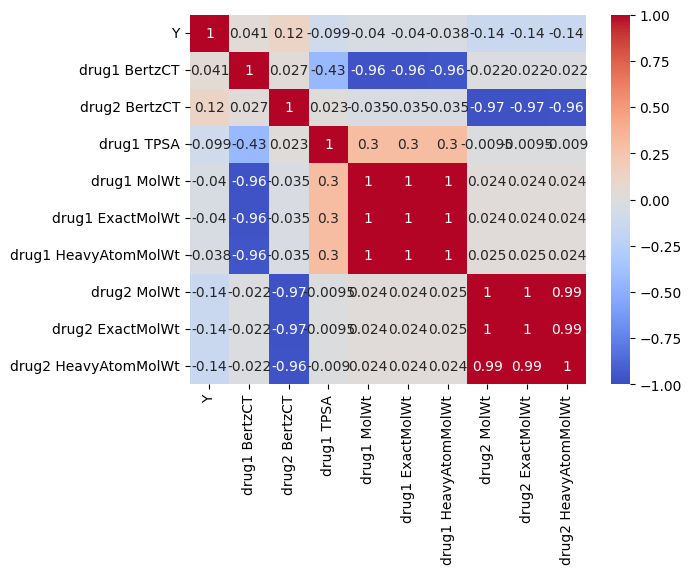

In [16]:
subdataset_top10_variancia = data[colunas_top10_variancia.index]
features_corr=subdataset_top10_variancia.corr()
sns.heatmap(features_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# plot
plt.show()